In [3]:

#import packages
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.cm as cm
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scienceplots
plt.style.use('science')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "beramono",
    "font.size"  : "14.0",
    "figure.constrained_layout.use" : True
})

Read timeseries and return average order parameter

In [10]:


path = "../data/observables/delay_0/"


dataFile = open("../data/observables/combinedData/delay_0.txt", "w")
pathdata = sorted(glob.glob(path+"*.txt"))
orderParameterData = []


for d in range(np.size(pathdata)):
    lines = np.loadtxt(pathdata[d], dtype=str, skiprows=1, max_rows=2, unpack=True)
    for i,l in enumerate(lines):
        k = l.find("=")
        value = eval(l[k+1:])
        if i==0: noiseStrength = value
        elif i==1: delayTime = value           
    time, polarOrderparameter, polarOrderparameter2, polarOrderparameter4 = np.loadtxt(pathdata[d], float, skiprows=5, unpack=True)
    dataFile.write(str(noiseStrength)+" "+str(np.mean(polarOrderparameter[20000:]) )+" "+str(np.mean(polarOrderparameter2[20000:] ))+" "+str(np.mean(polarOrderparameter4[20000:]))+"\n")
    # dataLine = str(noiseStrength) +" "+ str(np.var(polarOrderparameter[5000:40000]))+"\n"




dataFile.close()



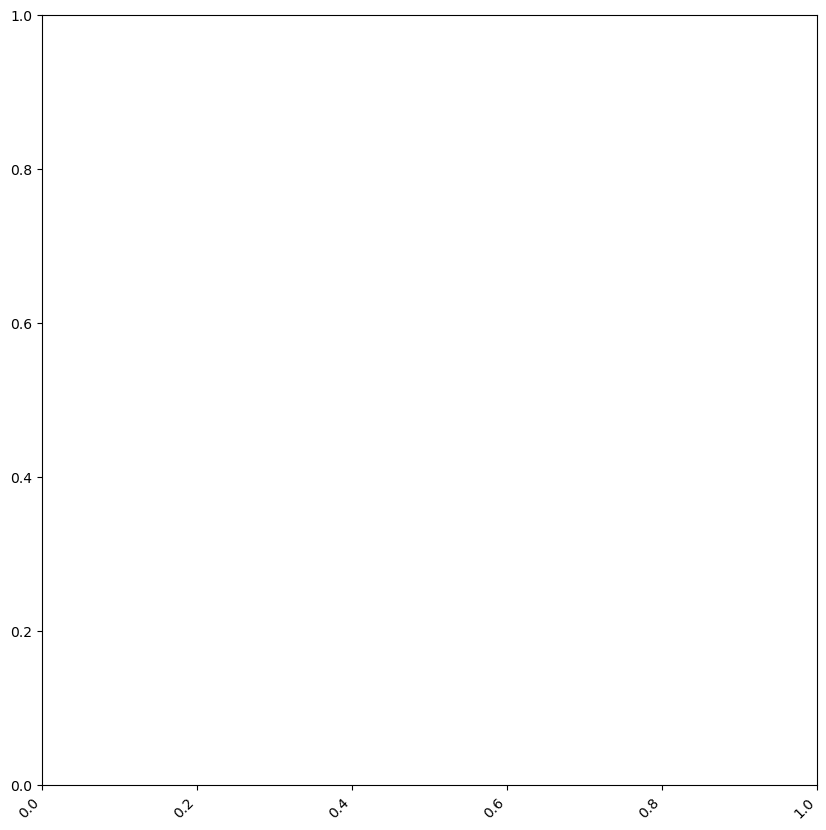

In [8]:
from matplotlib import ticker
plt.style.use('default')
f = 0
path = "../data/data1/observables/combinedData/"
fig, ax= plt.subplots(figsize=(10,10))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
for d in range(np.size(orderParameterData)):

    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d], unpack=True)       
    variance = 256*256*(orderParameter2 - orderParameter*orderParameter)
    ax.scatter(noise, orderParameter, marker='o', label = str(orderParameterData[d]))

    ax.legend()
    ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
    ax.set_xlabel("$\eta$", fontsize=18)
    ax.set_ylabel(r'$\psi$', fontsize=18)
    ax.set_xlim(0.55, 0.70)
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    ax.grid(axis='both')
f += 1

IndexError: list index out of range

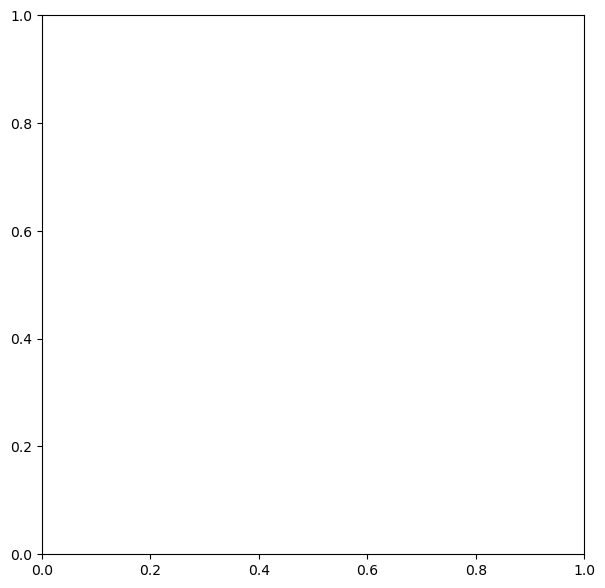

In [8]:

colours = ([16/256, 161/256, 157/256], [84/256, 3/256, 117/256], [255/256, 112/256, 0/256], [255/256, 191/256, 0/256])
colourA =itertools.cycle(colours)

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 0                                      |
#                                                                          |
#--------------------------------------------------------------------------|



orderParameterTotal = np.zeros(170)
orderParameter2Total = np.zeros(170)
orderParameter4Total = np.zeros(170)
delay =[0, 1, 3, 5]
f = 0
path = "../data/data4/combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
fig, ax= plt.subplots(figsize=(7,7))

for d in range(4):
    name = str(orderParameterData[d])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d], unpack=True)       
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)
ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.6)
f += 1


#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 1                                      |
#                                                                          |
#--------------------------------------------------------------------------|




orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../data/combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(3):
    name = str(orderParameterData[d+4])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+4], unpack=True)
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 3.0
orderParameter2Total /= 3.0
orderParameter4 /= 3.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.9)



f+=1
#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 3                                      |
#                                                                          |
#--------------------------------------------------------------------------|

orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../data/combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+7])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+11], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.5, 0.7)


f+=1

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 5                                      |
#                                                                          |
#--------------------------------------------------------------------------|


orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../data/combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+8])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+15], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))



ax.legend()
ax.set_xlim(0.1, 0.9)
ax.minorticks_on()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)

plt.savefig('../savedImages/variance.eps', format='eps')





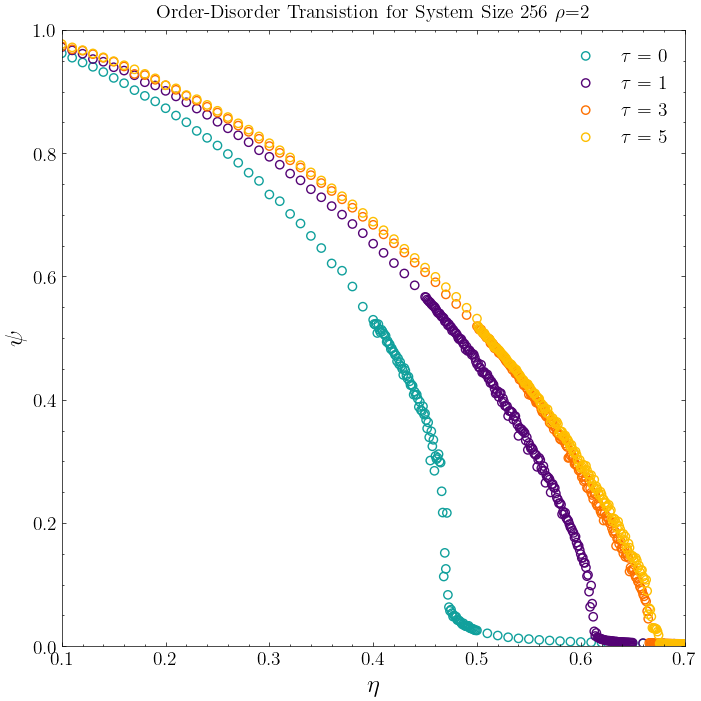

In [18]:

colours = ([16/256, 161/256, 157/256], [84/256, 3/256, 117/256], [255/256, 112/256, 0/256], [255/256, 191/256, 0/256])
colourA =itertools.cycle(colours)

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 0                                      |
#                                                                          |
#--------------------------------------------------------------------------|



orderParameterTotal = np.zeros(170)
orderParameter2Total = np.zeros(170)
orderParameter4Total = np.zeros(170)
delay =[0, 1, 3, 5]
f = 0
path = "../combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
fig, ax= plt.subplots(figsize=(7,7))

for d in range(4):
    name = str(orderParameterData[d])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d], unpack=True)       
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0
ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.6)
f += 1


#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 1                                      |
#                                                                          |
#--------------------------------------------------------------------------|




orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(3):
    name = str(orderParameterData[d+4])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+4], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 3.0
orderParameter2Total /= 3.0
orderParameter4 /= 3.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.9)



f+=1
#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 3                                      |
#                                                                          |
#--------------------------------------------------------------------------|

orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+7])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+7], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.5, 0.7)


f+=1

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 5                                     |
#                                                                          |
#--------------------------------------------------------------------------|


orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+11])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+11], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))



ax.legend()
ax.set_xlim(0.1, 0.7)
ax.set_ylim(0, 1.0)
ax.minorticks_on()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)

plt.savefig('../savedImages/variance.eps', format='eps')





In [ ]:

colours = ([16/256, 161/256, 157/256], [84/256, 3/256, 117/256], [255/256, 112/256, 0/256], [255/256, 191/256, 0/256])
colourA =itertools.cycle(colours)

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 0                                      |
#                                                                          |
#--------------------------------------------------------------------------|



orderParameterTotal = np.zeros(170)
orderParameter2Total = np.zeros(170)
orderParameter4Total = np.zeros(170)
delay =[0, 1, 3, 5]
f = 0
path = "../combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
fig, ax= plt.subplots(figsize=(7,7))

for d in range(4):
    name = str(orderParameterData[d])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d], unpack=True)       
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0
ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.6)
f += 1


#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 1                                      |
#                                                                          |
#--------------------------------------------------------------------------|




orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(3):
    name = str(orderParameterData[d+4])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+4], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 3.0
orderParameter2Total /= 3.0
orderParameter4 /= 3.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.9)



f+=1
#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 3                                      |
#                                                                          |
#--------------------------------------------------------------------------|

orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+7])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+7], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.5, 0.7)


f+=1

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 5                                     |
#                                                                          |
#--------------------------------------------------------------------------|


orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+11])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+11], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0

ax.scatter(noise, orderParameterTotal, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))



ax.legend()
ax.set_xlim(0.1, 0.7)
ax.set_ylim(0, 1.0)
ax.minorticks_on()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)

plt.savefig('../savedImages/variance.eps', format='eps')





15
../combinedData/delay_3_1.txt
../combinedData/delay_3_2.txt
../combinedData/delay_3_3.txt
../combinedData/delay_3_4.txt


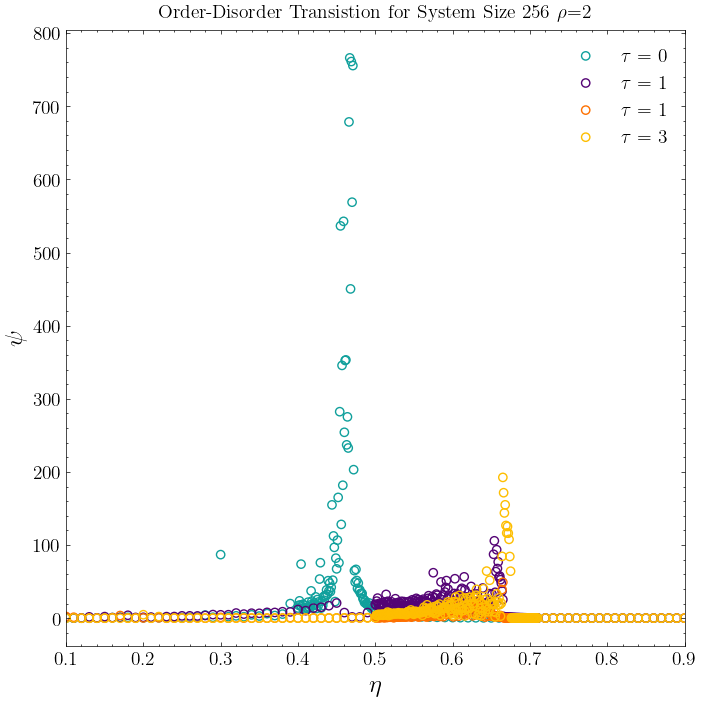

In [27]:
import mplcursors
colours = ([16/256, 161/256, 157/256], [84/256, 3/256, 117/256], [255/256, 112/256, 0/256], [255/256, 191/256, 0/256])
colourA =itertools.cycle(colours)

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 0                                      |
#                                                                          |
#--------------------------------------------------------------------------|



orderParameterTotal = np.zeros(170)
orderParameter2Total = np.zeros(170)
orderParameter4Total = np.zeros(170)
delay =[0, 1, 3, 5]
f = 0
path = "../combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
fig, ax= plt.subplots(figsize=(7,7))

print(np.size(orderParameterData))

for d in range(4):
    name = str(orderParameterData[d])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d], unpack=True)       
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)
ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.6)
f += 1


#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 1                                      |
#                                                                          |
#--------------------------------------------------------------------------|




orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

for d in range(4):
    name = str(orderParameterData[d+4])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+4], unpack=True)
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4 /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.1, 0.9)



# f+=1
#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 3                                      |
#                                                                          |
#--------------------------------------------------------------------------|

orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

for d in range(4):
    name = str(orderParameterData[d+7])
    print(name)
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+7], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.3, 0.7)


f+=1

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 5                                      |
#                                                                          |
#--------------------------------------------------------------------------|


orderParameterTotal = np.zeros(270)
orderParameter2Total = np.zeros(270)
orderParameter4Total = np.zeros(270)

path = "../combinedData/"
# #-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

for d in range(4):
    name = str(orderParameterData[d+11])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[d+11], unpack=True)
    
    
    orderParameterTotal = np.add(orderParameterTotal, orderParameter)
    orderParameter2Total = np.add(orderParameter2Total,orderParameter2)
    orderParameter4Total = np.add(orderParameter4Total, orderParameter4)
orderParameterTotal /= 4.0
orderParameter2Total /= 4.0
orderParameter4Total /= 4.0
variance = 256*256*(orderParameter2Total - orderParameterTotal*orderParameterTotal)

ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(delay[f]))


mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))

ax.legend()
ax.set_xlim(0.1, 0.9)
ax.minorticks_on()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))
plt.savefig('../savedImages/variance.eps', format='eps')





15


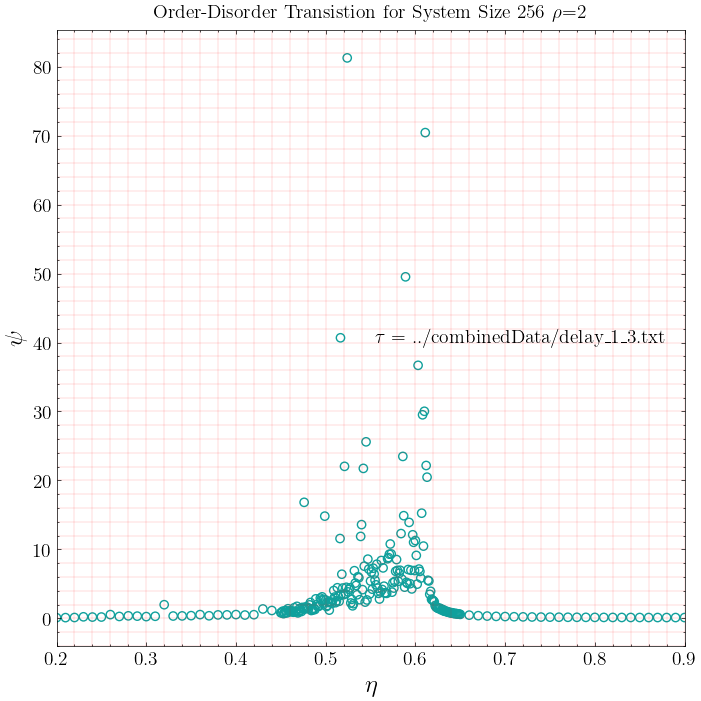

In [57]:

import mplcursors

colours = ([16/256, 161/256, 157/256], [84/256, 3/256, 117/256], [255/256, 112/256, 0/256], [255/256, 191/256, 0/256])
colourA =itertools.cycle(colours)

#--------------------------------------------------------------------------|
#                                                                          |
#                           Delay = 0                                      |
#                                                                          |
#--------------------------------------------------------------------------|



orderParameterTotal = np.zeros(170)
orderParameter2Total = np.zeros(170)
orderParameter4Total = np.zeros(170)
delay =[0, 1, 3, 5]
f = 0
path = "../combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))
fig, ax= plt.subplots(figsize=(7,7))

print(np.size(orderParameterData))

for d in range(1):
    name = str(orderParameterData[6])
    noise, orderParameter, orderParameter2, orderParameter4 = np.loadtxt(orderParameterData[6], unpack=True)       
    variance = 256*256*(orderParameter2 - orderParameter*orderParameter)
    ax.scatter(noise, variance, marker='o', facecolors='none', edgecolors=next(colourA), label=r'$\tau=$ '+str(name))


mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))

ax.legend()
ax.set_title("Order-Disorder Transistion for System Size 256" r' $\rho$=2', fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$\eta$", fontsize=18)
ax.set_ylabel(r'$\psi$', fontsize=18)
ax.set_xlim(0.2, 0.9)
ax.grid(color='r', linestyle='-', linewidth=0.1, which='both')
plt.show()